<a href="https://colab.research.google.com/github/faezesarlakifar/Unibo-FAIKR-M3-project/blob/main/Diabetes_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @markdown Install Necessary Libraries
!pip install -q pandas numpy pgmpy scikit-learn networkx matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.9 MB/s eta 0:00:00


In [35]:
!apt-get install -q graphviz libgraphviz-dev pkg-config

Reading package lists...
Building dependency tree...
Reading state information...
pkg-config is already the newest version (0.29.2-1ubuntu3).
graphviz is already the newest version (2.42.2-6ubuntu0.1).
libgraphviz-dev is already the newest version (2.42.2-6ubuntu0.1).
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


In [36]:
!pip install -q pygraphviz

In [ ]:
# @markdown Mount Google Drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# @title Load Dataset
import pandas as pd

file_path = "/content/drive/My Drive/diabetes_indicators.csv"

df = pd.read_csv(file_path)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,10.0,4.0,5.0
1,0.0,0.0,0.0,1.0,33.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,3.0,1.0,0.0,13.0,5.0,4.0
2,0.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,5.0,0.0,1.0,8.0,6.0,6.0
3,0.0,0.0,1.0,1.0,29.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,7.0,5.0,8.0
4,1.0,1.0,0.0,1.0,47.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,30.0,10.0,1.0,1.0,6.0,6.0,3.0


In [ ]:
# @markdown Get Features
columns = df.columns

columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [ ]:
# @title Discretize Continuous Variables
df['BMI'] = pd.cut(df['BMI'], bins=3, labels=[0, 1, 2])  # Low, Medium, High
df['Age'] = pd.cut(df['Age'], bins=3, labels=[0, 1, 2])  # Young, Middle, Old
df['MentHlth'] = pd.cut(df['MentHlth'], bins=2, labels=[0, 1])  # Good, Bad
df['PhysHlth'] = pd.cut(df['PhysHlth'], bins=2, labels=[0, 1])  # Good, Bad

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Diabetes_binary       70692 non-null  float64 
 1   HighBP                70692 non-null  float64 
 2   HighChol              70692 non-null  float64 
 3   CholCheck             70692 non-null  float64 
 4   BMI                   70692 non-null  category
 5   Smoker                70692 non-null  float64 
 6   Stroke                70692 non-null  float64 
 7   HeartDiseaseorAttack  70692 non-null  float64 
 8   PhysActivity          70692 non-null  float64 
 9   Fruits                70692 non-null  float64 
 10  Veggies               70692 non-null  float64 
 11  HvyAlcoholConsump     70692 non-null  float64 
 12  AnyHealthcare         70692 non-null  float64 
 13  NoDocbcCost           70692 non-null  float64 
 14  GenHlth               70692 non-null  float64 
 15  Me

# Basic Manually Designed Model

In [ ]:
from pgmpy.models import BayesianNetwork

bn = BayesianNetwork([

    # Blood pressure, cholesterol & heart disease
    ("HighBP", "HeartDiseaseorAttack"),
    ("HighChol", "HeartDiseaseorAttack"),

    # Age-related health risks
    ("Age", "HighBP"),
    ("Age", "HighChol"),
    # ("Age", "HeartDiseaseorAttack"),

    # Heart disease & diabetes link
    ("HeartDiseaseorAttack", "Diabetes_binary"),

    # Diet affecting BMI
    ("Fruits", "BMI"),
    ("Veggies", "BMI"),
    ("Age", "BMI"),
    ("PhysActivity", "BMI"),
    ("BMI", "Diabetes_binary"),
    ("PhysActivity", "Diabetes_binary"),

    # Lifestyle & physical health
    ("Stroke", "PhysHlth"),
    ("DiffWalk", "PhysActivity"),
    ("PhysHlth", "PhysActivity"),

    # Healthcare access & diabetes
    ("Inocme", "NoDocbcCost"),
    ("NoDocbcCost", "Diabetes_binary"),
    ("AnyHealthcare", "Diabetes_binary"),
])

print("Final Bayesian Network defined successfully!")

Final Bayesian Network defined successfully!


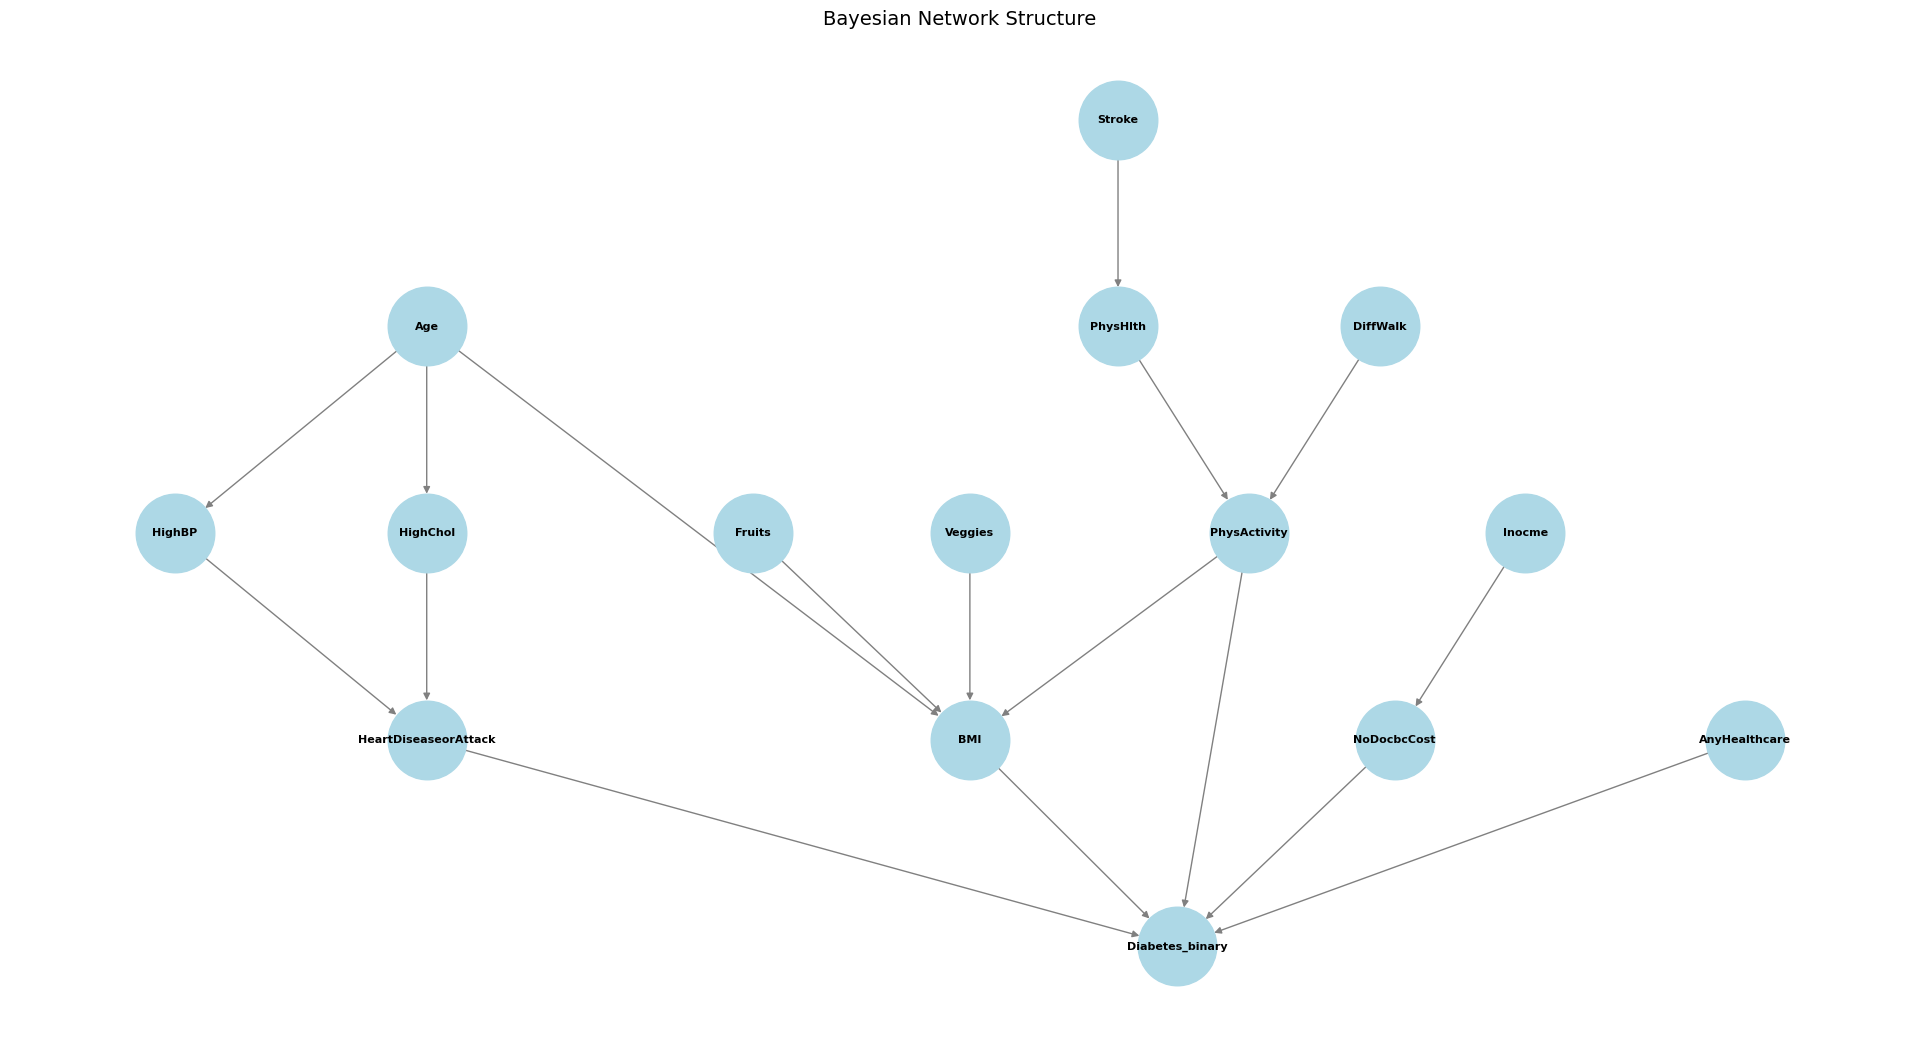

In [ ]:
# @title Plot my thoughts
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

# Convert BN to a networkx graph
G = nx.DiGraph()
G.add_edges_from(bn.edges())

# Define Graphviz layout
pos = graphviz_layout(G, prog="dot")

# Draw the Bayesian Network
plt.figure(figsize=(19, 10))
# pos = nx.spring_layout(G, seed=42)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_size=3200, node_color="lightblue", edge_color="gray", font_size=8, font_weight="bold")
plt.title("Bayesian Network Structure", fontsize=14)
plt.show()


# Use Hill Climbing Search to find Causal Relations

In [ ]:
from pgmpy.estimators import HillClimbSearch, BicScore

hc = HillClimbSearch(df)
best_model = hc.estimate(scoring_method=BicScore(df))

# Print learned edges
print(best_model.edges())


  0%|          | 0/1000000 [00:00<?, ?it/s]

[('Diabetes_binary', 'HighBP'), ('Diabetes_binary', 'HighChol'), ('Diabetes_binary', 'CholCheck'), ('Diabetes_binary', 'HvyAlcoholConsump'), ('Diabetes_binary', 'BMI'), ('HighBP', 'HighChol'), ('HighBP', 'HeartDiseaseorAttack'), ('HighBP', 'CholCheck'), ('HighBP', 'Stroke'), ('Smoker', 'Education'), ('Smoker', 'Sex'), ('Smoker', 'GenHlth'), ('Smoker', 'HvyAlcoholConsump'), ('Smoker', 'HeartDiseaseorAttack'), ('Smoker', 'Age'), ('HeartDiseaseorAttack', 'Stroke'), ('HeartDiseaseorAttack', 'Sex'), ('HeartDiseaseorAttack', 'HighChol'), ('PhysActivity', 'PhysHlth'), ('Fruits', 'Veggies'), ('Fruits', 'PhysActivity'), ('Fruits', 'Smoker'), ('Fruits', 'Sex'), ('Fruits', 'Education'), ('Veggies', 'PhysActivity'), ('Veggies', 'Income'), ('AnyHealthcare', 'CholCheck'), ('NoDocbcCost', 'AnyHealthcare'), ('NoDocbcCost', 'CholCheck'), ('GenHlth', 'DiffWalk'), ('GenHlth', 'Diabetes_binary'), ('GenHlth', 'HeartDiseaseorAttack'), ('GenHlth', 'PhysActivity'), ('GenHlth', 'MentHlth'), ('GenHlth', 'PhysHl

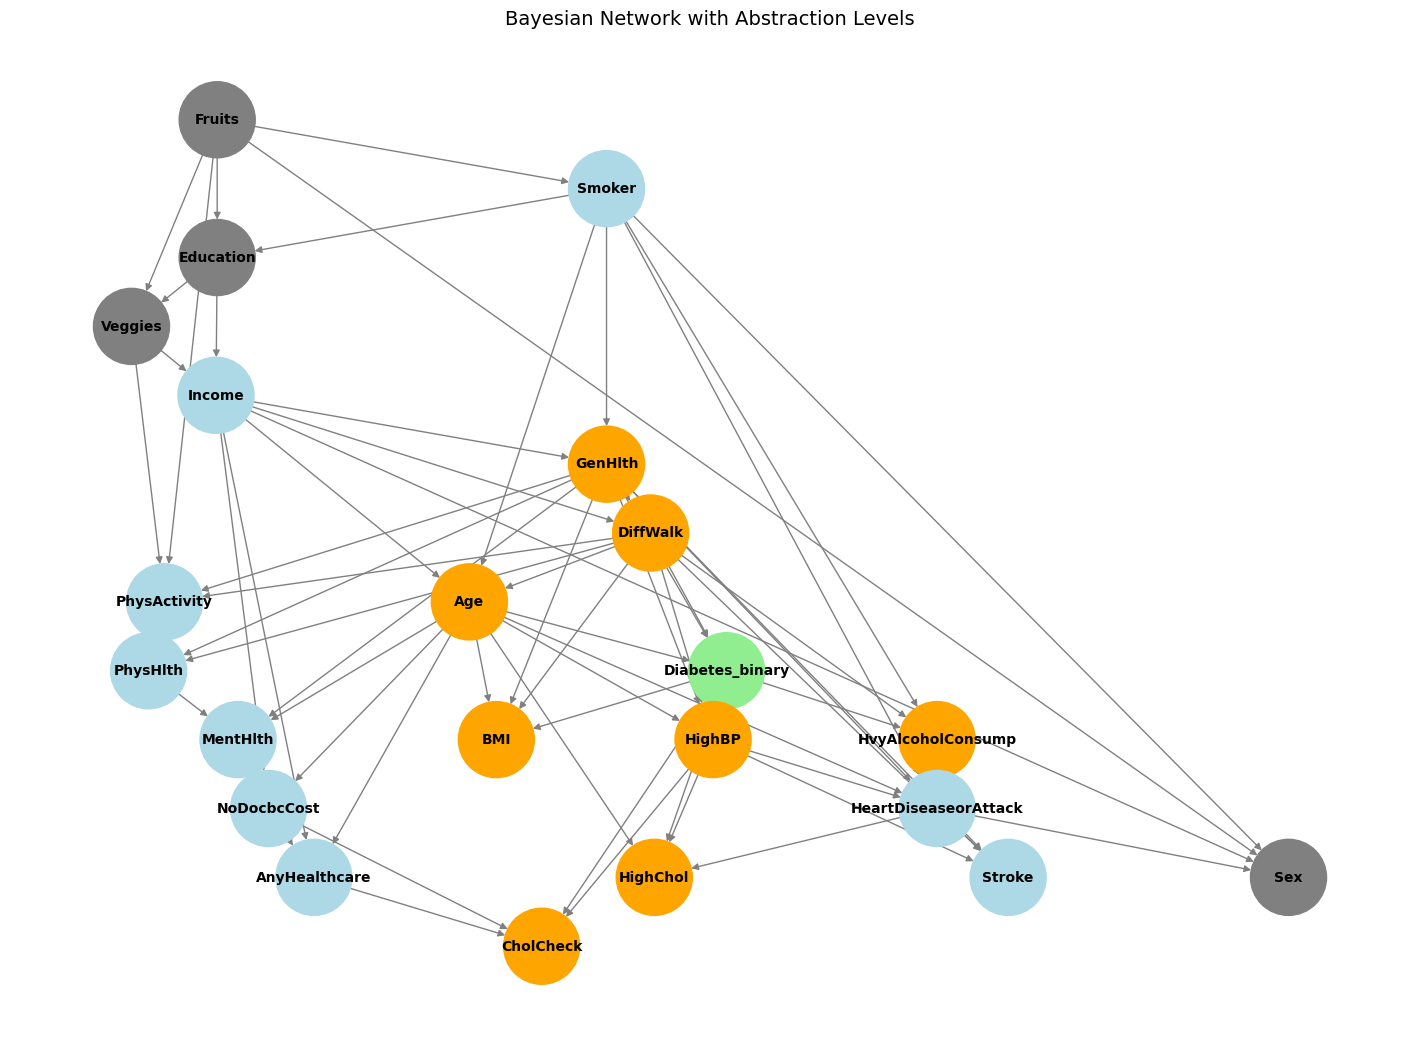

In [32]:
# @title Plot found causal relations
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

target_node = "Diabetes_binary"

# Find direct connections (1st level)
first_level_nodes = set(nx.all_neighbors(G, target_node))

# Find second-level connections (indirect)
second_level_nodes = set()
for node in first_level_nodes:
    second_level_nodes.update(nx.all_neighbors(G, node))

# Remove first-level nodes from second-level set
second_level_nodes -= first_level_nodes
second_level_nodes.discard(target_node)

node_colors = {}
for node in G.nodes:
    if node == target_node:
        node_colors[node] = "lightgreen"
    elif node in first_level_nodes:
        node_colors[node] = "orange"
    elif node in second_level_nodes:
        node_colors[node] = "lightblue"
    else:
        node_colors[node] = "gray"

# Define Graphviz layout
pos = graphviz_layout(G, prog="dot")

plt.figure(figsize=(14, 10))
nx.draw(
    G, pos, with_labels=True,
    node_size=3000,
    node_color=[node_colors[n] for n in G.nodes()],
    font_size=10,
    edge_color="gray",
    font_weight="bold",
    arrows=True
)

plt.title("Bayesian Network with Abstraction Levels", fontsize=14)
plt.show()

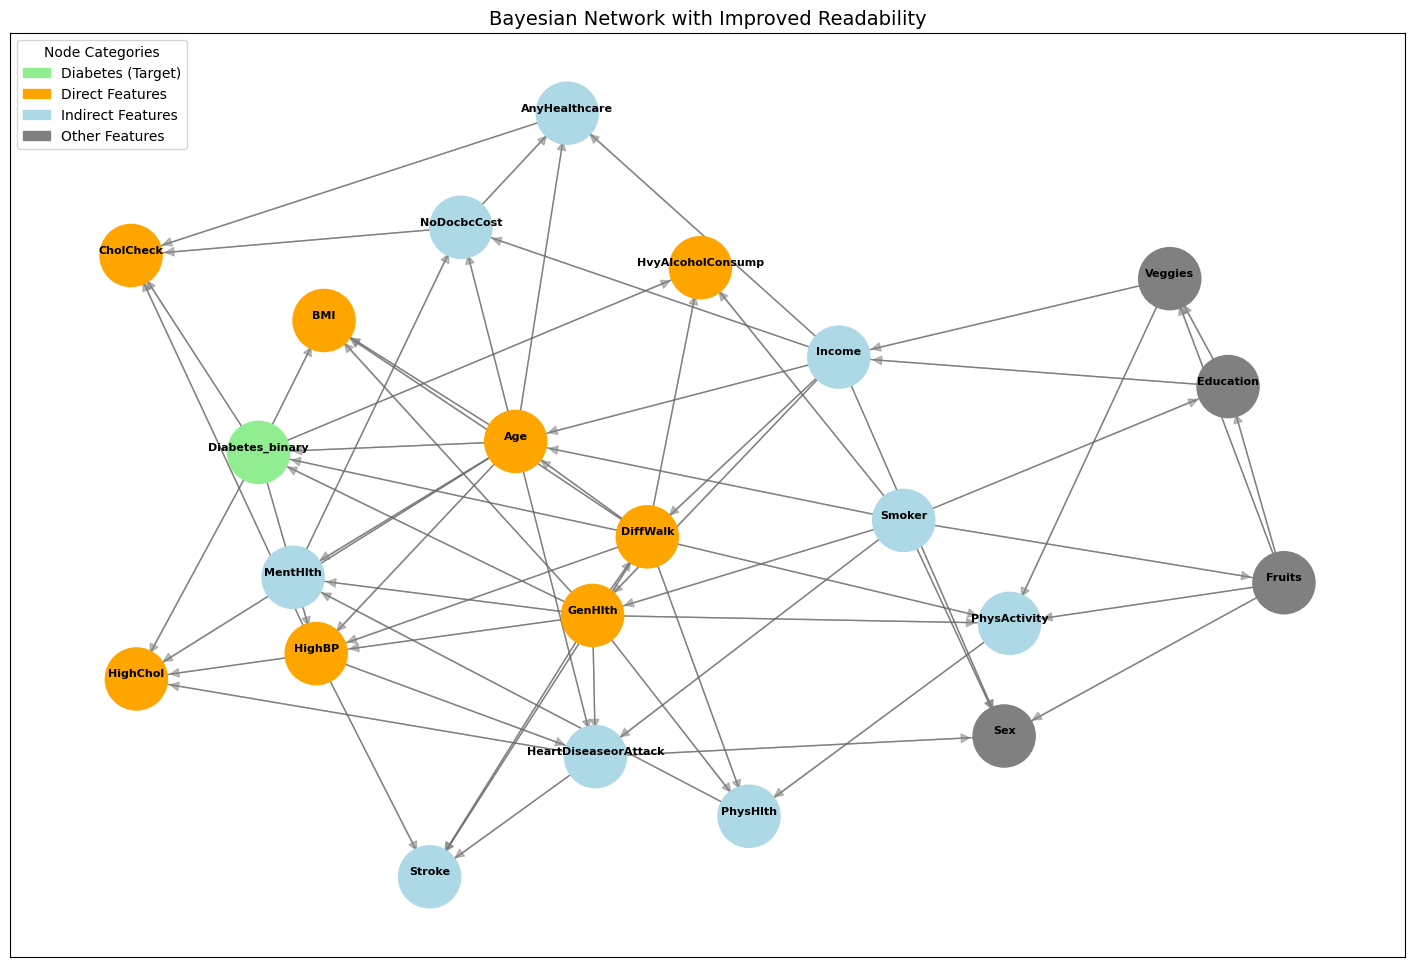

In [ ]:
# @title Plot found causal relations (Better View)
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from matplotlib.patches import FancyArrowPatch

plt.figure(figsize=(18, 12))
pos = graphviz_layout(G, prog="neato")

node_artists = nx.draw_networkx_nodes(
    G, pos,
    node_color=[node_colors[n] for n in G.nodes()],
    node_size=2000
)

edges = nx.draw_networkx_edges(G, pos, alpha=0.5, arrows=False)

for u, v, data in G.edges(data=True):
    x_start, y_start = pos[u]
    x_end, y_end = pos[v]

    dx = x_end - x_start
    dy = y_end - y_start
    length = (dx**2 + dy**2)**0.5

    dx /= length
    dy /= length

    arrow = FancyArrowPatch(
        (x_start + dx * 0.1, y_start + dy * 0.1),  # Start closer to the edge of node u
        (x_end - dx * 6.5, y_end - dy * 6.8),    # End closer to the edge of node v
        arrowstyle='-|>',
        mutation_scale=15,
        color='gray',
        lw=1,
        alpha=0.5,  # Transparency
    )
    plt.gca().add_patch(arrow)

nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold", verticalalignment="bottom")

import matplotlib.patches as mpatches
legend_labels = {
    "Diabetes (Target)": "lightgreen",
    "Direct Features": "orange",
    "Indirect Features": "lightblue",
    "Other Features": "gray"
}
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in legend_labels.items()]
plt.legend(handles=legend_patches, loc="upper left", fontsize=10, title="Node Categories")

plt.title("Bayesian Network with Improved Readability", fontsize=14)

plt.show()

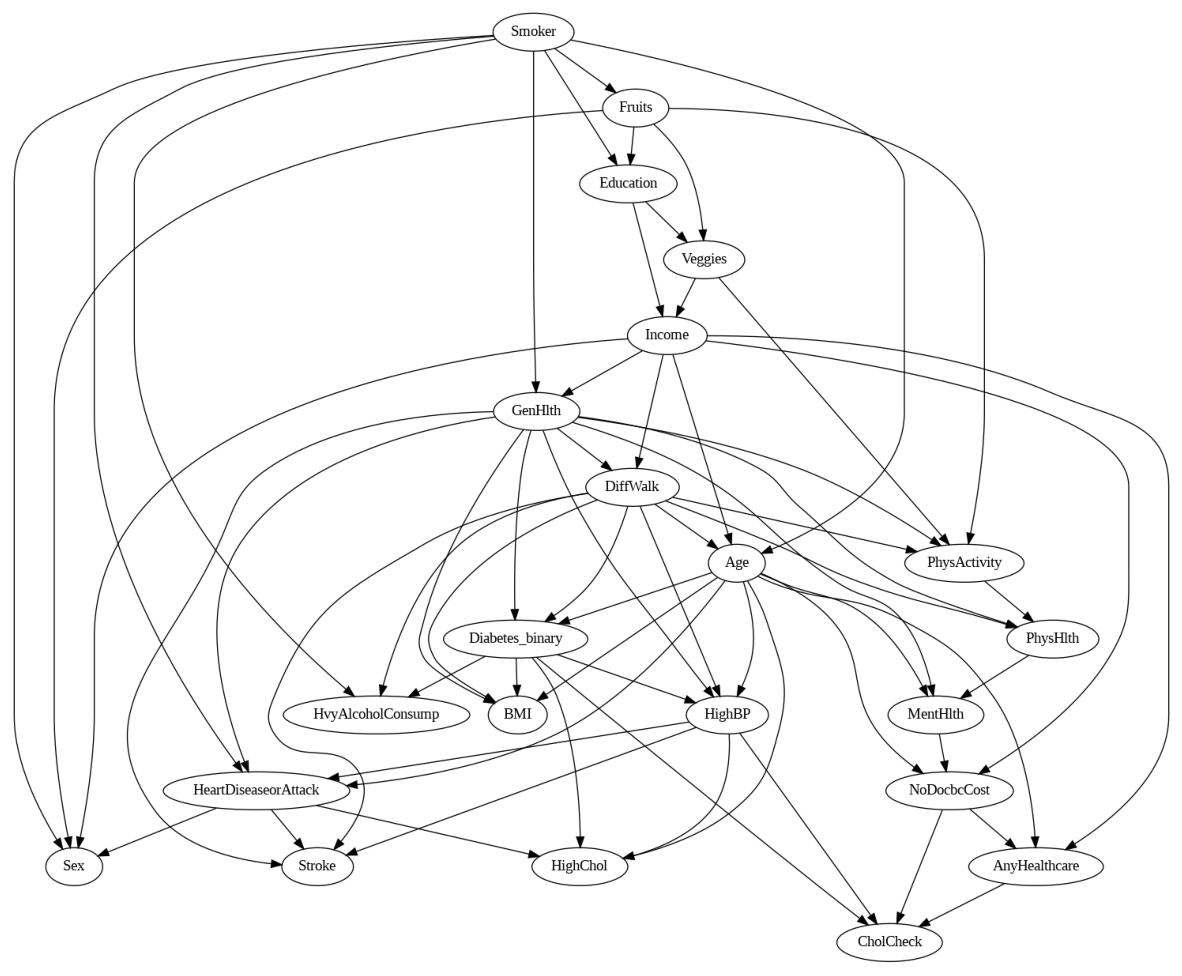

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pygraphviz as pgv
from networkx.drawing.nx_agraph import to_agraph

# Convert NetworkX graph to PyGraphviz AGraph (forces proper arrow rendering)
A = to_agraph(G)

# Use "fdp" layout for better spacing (or "dot" for tree-like structure)
A.layout(prog="dot")

A.draw("bayesian_network.png")

plt.figure(figsize=(15, 15))
img = plt.imread("bayesian_network.png")
plt.imshow(img)
plt.axis("off")
plt.show()


# Understanding Feature Contributions with SHAP

In [ ]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Fix categorical columns for XGBoost
for col in ['BMI', 'MentHlth', 'PhysHlth', 'Age']:
    df[col] = df[col].astype(float)

X = df.drop(columns=["Diabetes_binary"])
y = df["Diabetes_binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize for Neural Network & Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric="logloss", enable_categorical=False, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}

# Train Models
for name, model in models.items():
    print(f"Training {name}...")
    if name in ["Neural Network", "Logistic Regression"]:
        model.fit(X_train_scaled, y_train)
    else:
        model.fit(X_train, y_train)

# Compute SHAP Values & Plot for Each Model
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for i, (name, model) in enumerate(models.items()):
    print(f"Computing SHAP for {name}...")

    # Choose correct SHAP explainer
    if name in ["Random Forest", "XGBoost"]:
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
    elif name == "Logistic Regression":
        explainer = shap.LinearExplainer(model, X_train_scaled)
        shap_values = explainer.shap_values(X_test_scaled)
    elif name == "Neural Network":
        explainer = shap.KernelExplainer(model.predict_proba, X_train_scaled[:100])  # Use sample due to slow computation
        shap_values = explainer.shap_values(X_test_scaled[:100])

    # SHAP Summary Plot
    shap.summary_plot(shap_values, X_test if name in ["Random Forest", "XGBoost"] else X_test_scaled,
                      show=False, ax=axes[i])
    axes[i].set_title(f"SHAP for {name}")

plt.tight_layout()
plt.show()

Training Random Forest...
Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:59:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Logistic Regression...
Training Neural Network...
Computing SHAP for Random Forest...
